In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm
tqdm.pandas()

# Getting Data

In [3]:
# Import data

Data = pd.read_csv("C:\\Users\\hp\OneDrive\\Desktop\\Project\\BBC News Train.csv")
Data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
# Shape of the data
Data.shape

(1490, 3)

In [5]:
# Checking for Null Values
Data.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [6]:
# Drop a un-necessary column
Data.drop(columns=["ArticleId"], inplace=True)

In [7]:
Data.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [8]:
X = Data.Text
y = Data.Category

In [9]:
Data.Text.sample(10)

117     profits jump at china s top bank industrial an...
405     ten-year tragedy of missing manic richey edwar...
699     rocker doherty in on-stage fight rock singer p...
281     digital guru floats sub-$100 pc nicholas negro...
396     be careful how you code a new european directi...
1343    borders 19-20 ulster ulster clung on for a mor...
1263    gronkjaer agrees switch to madrid jesper gronk...
873     eu software patent law delayed controversial n...
75      china aviation seeks rescue deal scandal-hit j...
129     shares rise on new man utd offer shares in man...
Name: Text, dtype: object

In [10]:
# information of the data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1490 non-null   object
 1   Category  1490 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


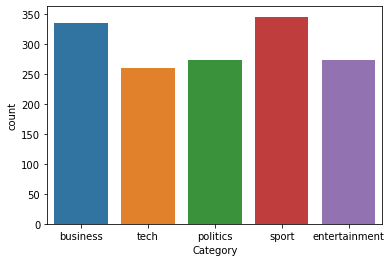

In [11]:
sns.countplot(data=Data, x='Category')
plt.show()

# Pre-Processing

In [12]:
import re
from bs4 import BeautifulSoup
import string
import wordninja as wn
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import string
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')

def preprocessing(sentence):
    # make smallercase
    sentence = sentence.lower()

    # remove emails
    sentence = re.sub(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', sentence)

    # remove mentions
    sentence = re.sub(r"@[A-Za-z0-9]+","", sentence)

    # Remove html
    sentence = BeautifulSoup(sentence, 'lxml').get_text().strip()

    # Remove URL
    sentence = re.sub(r'https?://\S+|www\.\S+', '', sentence)

    # Removing punctutation
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))

    # Remove non-alphabetic characters
    sentence = re.sub(r'[^a-zA-Z ]', '', sentence)

    # Spliting words into two meaningful word
#     sentence = ' '.join(wn.split(str(sentence)))

    # Correct the sentence
#     sentence =  str(TextBlob(sentence).correct())

    # decontracted

    ## specific
    sentence = re.sub(r"wont", "will not", sentence)
    sentence = re.sub(r"wouldnt", "would not", sentence)
    sentence = re.sub(r"shouldnt", "should not", sentence)
    sentence = re.sub(r"couldnt", "could not", sentence)
    sentence = re.sub(r"cudnt", "could not", sentence)
    sentence = re.sub(r"cant", "can not", sentence)
    sentence = re.sub(r"dont", "do not", sentence)
    sentence = re.sub(r"doesnt", "does not", sentence)
    sentence = re.sub(r"didnt", "did not", sentence)
    sentence = re.sub(r"wasnt", "was not", sentence)
    sentence = re.sub(r"werent", "were not", sentence)
    sentence = re.sub(r"havent", "have not", sentence)
    sentence = re.sub(r"hadnt", "had not", sentence)

    ## general
    sentence = re.sub(r"n\ t", " not", sentence)
    #sentence = re.sub(r"\re", " are", sentence)
    sentence = re.sub(r"\ s ", " is ", sentence) 
    sentence = re.sub(r"\ d ", " would ", sentence)
    sentence = re.sub(r"\ ll ", " will ", sentence)
    sentence = re.sub(r"\dunno", "do not ", sentence)
    sentence = re.sub(r"ive ", "i have ", sentence)
    sentence = re.sub(r"im ", "i am ", sentence)
    sentence = re.sub(r"i m ", "i am ", sentence)
    sentence = re.sub(r" w ", " with ", sentence)
    
    # Punctuation Removal
    sentence = "".join(i for i in sentence if i not in string.punctuation)
    
    # Stop Word Removal
    sentence = " ".join(i for i in sentence.split() if i not in allstopwords)


    # Lemmatize
    lm = WordNetLemmatizer()
    snt = ' '.join([lm.lemmatize(i) for i in sentence.split()])
    return snt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
Data["Tokens"] = Data.Text.progress_apply(lambda x: preprocessing(x)) 

100%|█████████████████████████████████████████████████████████████████████████████| 1490/1490 [00:10<00:00, 141.84it/s]


In [16]:
Data.head()

,Text,Category,Tokens
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launch defence lawyer defendin...
1,german business confidence slides german busin...,business,german business confidence slide german busine...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizen majo...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...


# Feature Engineering

# 1. Bag of Words model

# 2. TF-IDF Model

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

TfIdf_Vectorizer = TfidfVectorizer(tokenizer = token.tokenize)

X = TfIdf_Vectorizer.fit_transform(Data.Tokens)

X_array = X.toarray()

pd.DataFrame(data=X_array, columns = TfIdf_Vectorizer.get_feature_names_out()).head()

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aaron,aashare,ab,...,zombie,zone,zonealarm,zoom,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Detect Category

In [18]:
import re
from bs4 import BeautifulSoup
import string
from nltk.stem import WordNetLemmatizer

def detect_catagory(model, sentence):

    # make smallercase
    sentence = sentence.lower()
        
    # remove emails
    sentence = re.sub(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', sentence)

    # remove mentions
    sentence = re.sub(r"@[A-Za-z0-9]+","", sentence)
    
    # Remove html
    sentence = BeautifulSoup(sentence, 'lxml').get_text().strip()
    
    # Remove URL
    sentence = re.sub(r'https?://\S+|www\.\S+', '', sentence)
        
    # Removing punctutation, string.punctuation in python consists of !"#$%&\'()*+,-./:;<=>?@[\\]^_
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    
    # Remove non-alphabetic characters
    sentence = re.sub(r'[^a-zA-Z ]', '', sentence)

    # Spliting words into two meaningful word
    sentence = ' '.join(wn.split(str(sentence)))

    # Correct the sentence
    sentence =  str(TextBlob(sentence).correct())
    
    # decontracted
    
    ## specific
    sentence = re.sub(r"wont", "will not", sentence)
    sentence = re.sub(r"wouldnt", "would not", sentence)
    sentence = re.sub(r"shouldnt", "should not", sentence)
    sentence = re.sub(r"couldnt", "could not", sentence)
    sentence = re.sub(r"cudnt", "could not", sentence)
    sentence = re.sub(r"cant", "can not", sentence)
    sentence = re.sub(r"dont", "do not", sentence)
    sentence = re.sub(r"doesnt", "does not", sentence)
    sentence = re.sub(r"didnt", "did not", sentence)
    sentence = re.sub(r"wasnt", "was not", sentence)
    sentence = re.sub(r"werent", "were not", sentence)
    sentence = re.sub(r"havent", "have not", sentence)
    sentence = re.sub(r"hadnt", "had not", sentence)

    ## general
    sentence = re.sub(r"n\ t", " not", sentence)
    #sentence = re.sub(r"\re", " are", sentence)
    sentence = re.sub(r"\ s ", " is ", sentence) 
    sentence = re.sub(r"\ d ", " would ", sentence)
    sentence = re.sub(r"\ ll ", " will ", sentence)
    sentence = re.sub(r"\dunno", "do not ", sentence)
    sentence = re.sub(r"ive ", "i have ", sentence)
    sentence = re.sub(r"im ", "i am ", sentence)
    sentence = re.sub(r"i m ", "i am ", sentence)
    sentence = re.sub(r" w ", " with ", sentence)


    # Lemmatize
    lm = WordNetLemmatizer()
    snt = ' '.join([lm.lemmatize(i) for i in sentence.split()])
    
    return model.predict(TfIdf_Vectorizer.transform([snt]))[0]

# Getting weight of a word

In [19]:
def get_weight(model, word):
    try:
        print(model.coef_[0][list(TfIdf_Vectorizer.get_feature_names_out()).index(word)])
    except IndexError:
        print(model.coef_.toarray()[0][list(TfIdf_Vectorizer.get_feature_names_out()).index(word)])
    except ValueError:
        pass

# Model Building

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=40)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

# Check Cross Validation Score

clf = LogisticRegression(random_state=42, max_iter=1000)
np.average(cross_val_score(clf, X, y, cv=10))

0.9691275167785234

In [23]:
# Model Building
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.96      0.99      0.98       107
entertainment       0.98      0.99      0.98        95
     politics       0.99      0.98      0.98        85
        sport       0.97      0.99      0.98       110
         tech       1.00      0.95      0.97        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492



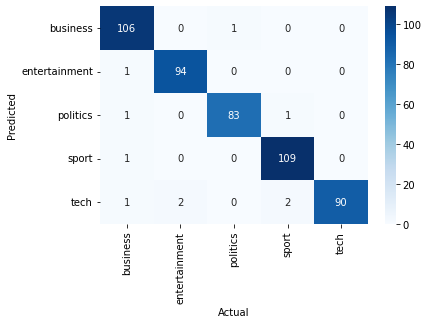

In [26]:
def plot_matrix(y_test, y_pred, color="Blues"):
    labels = np.unique(y_pred)
    cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=labels, columns=labels)
    sns.heatmap(cm_df, annot=True, fmt='g', cmap=color)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()
plot_matrix(y_test, y_pred)

# Random Forest Classifier

Accuracy : 0.975609756097561


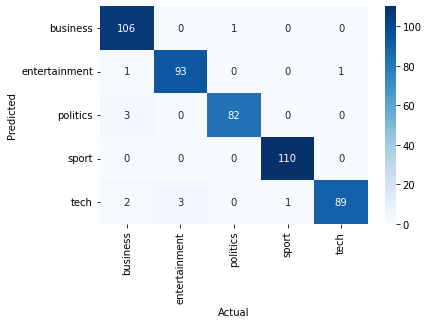

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=100, random_state=80)

rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))
plot_matrix(y_test, y_predicted)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_predi = rfc.predict(X_test)
print(classification_report(y_test, y_predi))

               precision    recall  f1-score   support

     business       0.95      0.99      0.97       107
entertainment       0.97      0.98      0.97        95
     politics       0.99      0.96      0.98        85
        sport       0.99      1.00      1.00       110
         tech       0.99      0.94      0.96        95

     accuracy                           0.98       492
    macro avg       0.98      0.97      0.98       492
 weighted avg       0.98      0.98      0.98       492



# Enter Article

In [29]:
article = """After weeks of speculation, Ranveer Singh has finally been announced as the star of the upcoming Don 3. He takes over from Shah Rukh Khan, who played the titular role in two Don movies, released in 2006 and 2011, respectively. The character was originally played by Amitabh Bachchan in the 1978 hit Don.

Excel Entertainment made the announcement via a video shared online. The video opens with a man sitting on the floor of a large room overlooking the neon-lit skyline of an unnamed city. The skyline itself appears to be a composite of multiple cities. The character slowly rises to his feet, takes off his hood, and lights a cigarette.

Also read | Ranveer Singh says performing Kathak for Rocky Aur Rani was challenging because of all the ‘muscle mass’ he was packing
The whole time, he is narrating an ominous voiceover in Hindi. “Sher jo so raha hai woh jaagega kab? Poochte hain yeh sab. Unse keh do ki phir jaag utha hoon main, aur phir saamne jald aane ko (When will the sleeping lion wake up? Everybody wants to know. Tell them, I am here).”"""

In [30]:
print("Detect category : " , detect_catagory(clf, article))

Detect category :  sport


In [31]:
get_weight(clf, "interesting")

-0.05634771899789506


In [32]:
import gradio as gr

# Assuming detect_category and clf have been defined elsewhere...

def gui_interface(article):
    category = detect_catagory(clf, article)
    return category

# Gradio interface
iface = gr.Interface(
    fn=gui_interface,                    
    inputs=gr.inputs.Textbox(placeholder="Enter your article here..."),  # Add a placeholder
    outputs="text",
    live=True,                           
    title="Article Category Detection", # Add a title
    description="Input an article and get its predicted category in real-time!",  # Add a description
    theme="huggingface",  # Using a predefined theme
    examples=[                           # Add some example articles for users to try
        ["Tech companies are at the forefront of innovation."],
        ["Recent sports events have garnered much attention."]
    ]
)

iface.launch()


C:\Users\hp\anaconda3\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\hp\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\hp\anaconda3\lib\site-packages\gradio\blocks.py:636: UserWarning: Cannot load huggingface. Caught Exception: The space huggingface does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
